# **Árboles de decisión**
Los árboles de decisión son un algoritmo de aprendizaje automático que se utiliza en la ciencia de datos para procesar grandes volúmenes datos y solventar problemas.
Los árboles de decisión son algoritmos estadísticos o técnicas de machine learning que nos permiten la construcción de modelos predictivos de analítica de datos para el Big Data basados en su clasificación según ciertas características o propiedades, o en la regresión mediante la relación entre distintas variables para predecir el valor de otra.

.

En los **modelos de clasificación** queremos predecir el valor de una variable mediante la clasificación de la información en función de otras variables (tipo, pertenencia a un grupo…). Por ejemplo, queremos pronosticar qué personas comprarán un determinado producto, clasificando entre clientes y no clientes, o qué marcas de portátiles comprará cada persona mediante la clasificación entre las distintas marcas. Los valores a predecir son predefinidos, es decir, los resultados están definidos en un conjunto de posibles valores.

En los **modelos de regresión** se intenta predecir el valor de una variable en función de otras variables que son independientes entre sí. Por ejemplo, queremos predecir el precio de venta del terreno en función de variables como su localización, superficie, distancia a la playa, etc. El posible resultado no forma parte de un conjunto predefinido, sino que puede tomar cualquier posible valor.

 .

El *árbol de decisión* es una estructura que está formada por **ramas** y **nodos** de distintos tipos:
* Los nodos internos representan cada una de las características o propiedades a considerar para tomar una decisión.
* Las ramas representan la decisión en función de una determinada condición (p. ej. probabilidad de ocurrencia)
* Los nodos finales representan el resultado de la decisión.

.

Utilizaremos la librería **Scikit-learn**, de aprendizaje automático más populares en Python. La biblioteca **scikit-learn** contiene muchas herramientas eficientes para aprendizaje automático y modelado estadístico, incluyendo clasificación, regresión, agrupación, y reducción de dimensionalidad.

## **Gestión de librerias**

In [ ]:
# Importar las librerias

# Procesar la informacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Arbol de decision
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score

In [ ]:
# Cargar los datos
df = pd.read_excel('Dataset_final.xlsx')

In [ ]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Documento                  295 non-null    int64  
 1   Nombre                     295 non-null    object 
 2   Apellidos                  295 non-null    object 
 3   Direccción                 295 non-null    object 
 4   Teléfono                   295 non-null    object 
 5   Edad                       295 non-null    int64  
 6   Estatura                   295 non-null    float64
 7   Área de residencia         294 non-null    object 
 8   Tipo colegio               294 non-null    object 
 9   Género                     294 non-null    object 
 10  Estrato                    294 non-null    float64
 11  Nota Matematicas           294 non-null    float64
 12  Nota Lecto Escritura       294 non-null    float64
 13  Apoyo económico de padres  294 non-null    object 

In [ ]:
#Obtener informacion del dataset - Datos
df

,Documento,Nombre,Apellidos,Direccción,Teléfono,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,115320053,Sofia,Gómez,"Calle 100 #25-26, Bogotá, Colombia",+57 311 2345678,23,1.57,Urbana,Público,Femenino,3.0,1.0,3.0,No,11.0
1,1105101947,Santiago,González,"Carrera 14 #10-20, Medellín, Colombia",+57 317 3456789,19,1.75,Urbana,Privado,Masculino,4.0,5.0,4.0,Sí,11.0
2,1023100010,Valentina,Herrera,"Vereda San José, Girardota, Colombia",+57 312 4567890,16,1.63,Rural,Público,Femenino,1.0,3.0,2.0,Sí,9.0
3,1208200021,Juan,Rojas,"Calle 30 #18-15, Bucaramanga, Colombia",+57 320 5678901,17,1.80,Urbana,Público,Masculino,2.0,2.0,2.0,No,10.0
4,1050500050,Catalina,Jiménez,"Avenida 5 #23-45, Cali, Colombia",+57 319 6789012,15,1.64,Urbana,Privado,Femenino,4.0,4.0,5.0,Sí,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,1645678901,Isabel,Gonzalez,Av. Bolívar 789,3478901,16,1.62,Urbana,Público,Femenino,4.0,4.0,4.0,Si,11.0
291,1656789012,Julio,Perez,El Bosque 234,3123456,18,1.80,Rural,Privado,Masculino,5.0,5.0,5.0,Si,11.0
292,1667890123,Ana,Martinez,Carrera 7 567,3289012,17,1.65,Urbana,Público,Femenino,2.0,3.0,3.0,No,10.0
293,1678901234,David,Perez,Barrio Las Margaritas 123,3256789,16,1.80,Urba,Privado,Masculino,3.0,3.0,3.0,Si,10.0


## **Preparación de los datos**

In [ ]:
#Eliminar las filas con valores nulos
df = df.dropna()

In [ ]:
# CONVERSION DE ETIQUETAS SEGUN EL METODO

#Reemplazar Urba y Urban por Urbana en la columna "Área de residencia"
df['Área de residencia'] = df['Área de residencia'].replace('Urba', 'Urbana')
df['Área de residencia'] = df['Área de residencia'].replace('Urban', 'Urbana')
#Crear la columna "Área de residencia" -> Urbana:0 y Rural:1
df['Área de residencia'] = np.where(df['Área de residencia'] == 'Urbana', 0, 1)

#Reemplazar valores de Publico y privado en la columna "Tipo Colegio"
df['Tipo colegio'] = df['Tipo colegio'].replace('Privad', 'Privado')
df['Tipo colegio'] = df['Tipo colegio'].replace('Públic', 'Público')
df['Tipo colegio'] = df['Tipo colegio'].replace('Públi', 'Público')
#Crear la columna "Colegio" -> Público:0 y Privado:1
df['Tipo colegio'] = np.where(df['Tipo colegio'] == 'Público', 0, 1)

#Reemplazar valores Masculino y Femenino en la columna "Genero"
df['Género'] = df['Género'].replace('Mascu', 'Masculino')
#Crear la columna "Género" -> Femenimo:0 y Masculino:1
df['Género'] = np.where(df['Género'] == 'Femenino', 0, 1)

#Reemplazar Sí por Si en la columna "Apoyo económico de padres"
df['Apoyo económico de padres'] = df['Apoyo económico de padres'].replace('Sí', 'Si')
#Crear la columna "Apoyo economico" y asignarle un valor de 0 si es no o 1 si es si
df['Apoyo económico de padres'] = np.where(df['Apoyo económico de padres'] == 'Si', 1, 0)

<ipython-input-7-8440bf6bb729>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Área de residencia'] = df['Área de residencia'].replace('Urba', 'Urbana')
<ipython-input-7-8440bf6bb729>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Área de residencia'] = df['Área de residencia'].replace('Urban', 'Urbana')
<ipython-input-7-8440bf6bb729>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
#Eliminar las columnas que no se van a utilizar
df = df.drop(['Documento', 'Nombre', 'Apellidos', 'Direccción', 'Teléfono'], axis=1)
df

,Edad,Estatura,Área de residencia,Tipo colegio,Género,Estrato,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres,Último grado cursado
0,23,1.57,0,0,0,3.0,1.0,3.0,0,11.0
1,19,1.75,0,1,1,4.0,5.0,4.0,1,11.0
2,16,1.63,1,0,0,1.0,3.0,2.0,1,9.0
3,17,1.80,0,0,1,2.0,2.0,2.0,0,10.0
4,15,1.64,0,1,0,4.0,4.0,5.0,1,10.0
...,...,...,...,...,...,...,...,...,...,...
290,16,1.62,0,0,0,4.0,4.0,4.0,1,11.0
291,18,1.80,1,1,1,5.0,5.0,5.0,1,11.0
292,17,1.65,0,0,0,2.0,3.0,3.0,0,10.0
293,16,1.80,0,1,1,3.0,3.0,3.0,1,10.0


<ipython-input-9-481a145dd8a4>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  correlation_matrix.values[[range(correlation_matrix.shape[0])]*2] = 0


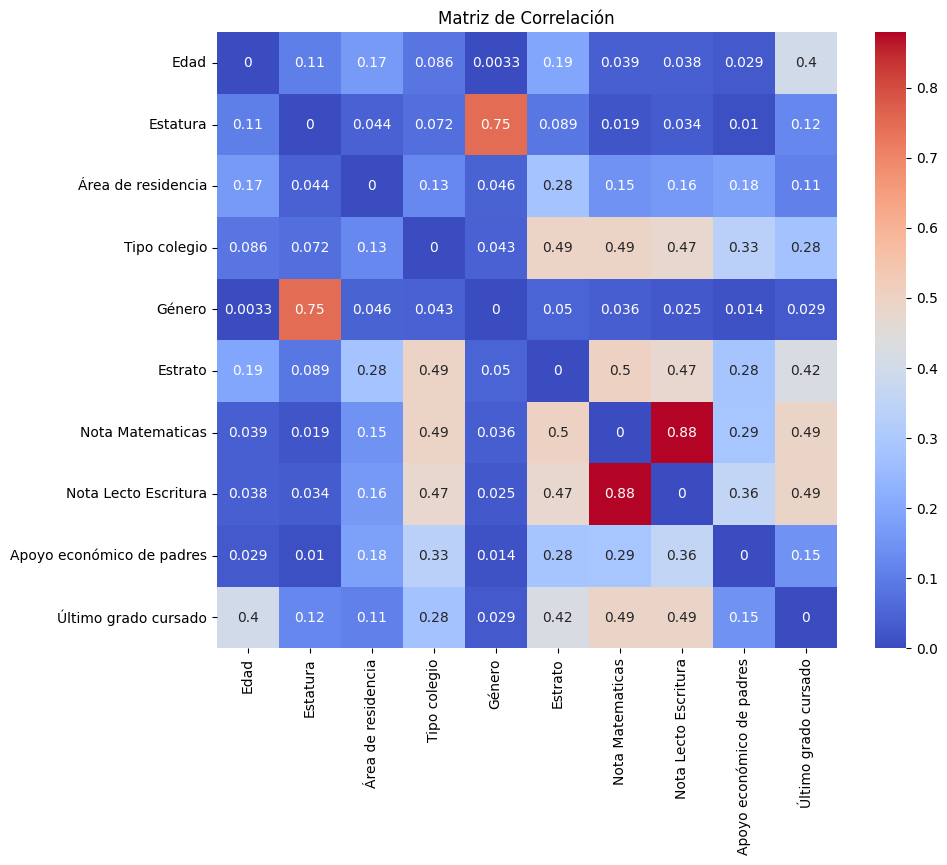

In [ ]:
# calcular la matriz de correlación de todas las variables del DataFrame
correlation_matrix = df.corr().abs()

# Excluir la diagonal de la matriz de correlación
correlation_matrix.values[[range(correlation_matrix.shape[0])]*2] = 0

# Obtener las variables más correlacionadas
most_correlated = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Visualizar las variables más correlacionadas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
#Eliminar las columnas que no se correlacionan
df = df.drop(['Edad', 'Área de residencia', 'Tipo colegio', 'Estrato', 'Último grado cursado'], axis=1)

In [ ]:
df

,Estatura,Género,Nota Matematicas,Nota Lecto Escritura,Apoyo económico de padres
0,1.57,0,1.0,3.0,0
1,1.75,1,5.0,4.0,1
2,1.63,0,3.0,2.0,1
3,1.80,1,2.0,2.0,0
4,1.64,0,4.0,5.0,1
...,...,...,...,...,...
290,1.62,0,4.0,4.0,1
291,1.80,1,5.0,5.0,1
292,1.65,0,3.0,3.0,0
293,1.80,1,3.0,3.0,1


In [ ]:
#Cambiar el nombre de las columnas correlacionadas
df.columns = ['estatura', 'genero', 'matematicas', 'lecto_escritura', 'apoyo_economico']

In [ ]:
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico
0,1.57,0,1.0,3.0,0
1,1.75,1,5.0,4.0,1
2,1.63,0,3.0,2.0,1
3,1.80,1,2.0,2.0,0
4,1.64,0,4.0,5.0,1
...,...,...,...,...,...
290,1.62,0,4.0,4.0,1
291,1.80,1,5.0,5.0,1
292,1.65,0,3.0,3.0,0
293,1.80,1,3.0,3.0,1


In [ ]:
# Crear la columna "Clasificación" con los valores correspondientes a las categorias estudiantiles
df['clasificacion'] = ''

In [ ]:
# Clasificamos los datos 0-3: Desertor, 3-3.5: Alerta y 3.6-5:Buen_Estudiante
for index, row in df.iterrows():
    if row['matematicas'] >= 3.6 and row['lecto_escritura'] >= 3.6:
        df.loc[index, 'clasificacion'] = 'Buen_estudiante'
    elif 3.0 <= row['matematicas'] <= 3.5 or 3.0 <= row['lecto_escritura'] <= 3.5:
        df.loc[index, 'clasificacion'] = 'Alerta'
    else:
        df.loc[index, 'clasificacion'] = 'Desertor'

In [ ]:
df

,estatura,genero,matematicas,lecto_escritura,apoyo_economico,clasificacion
0,1.57,0,1.0,3.0,0,Alerta
1,1.75,1,5.0,4.0,1,Buen_estudiante
2,1.63,0,3.0,2.0,1,Alerta
3,1.80,1,2.0,2.0,0,Desertor
4,1.64,0,4.0,5.0,1,Buen_estudiante
...,...,...,...,...,...,...
290,1.62,0,4.0,4.0,1,Buen_estudiante
291,1.80,1,5.0,5.0,1,Buen_estudiante
292,1.65,0,3.0,3.0,0,Alerta
293,1.80,1,3.0,3.0,1,Alerta


## **Aprendizaje del modelo**

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df[['matematicas', 'lecto_escritura']]
y = df['clasificacion']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

## **Evaluación del modelo**

El **accuracy** es una métrica comúnmente utilizada para evaluar la precisión de un modelo de clasificación. Mide la proporción de predicciones correctas realizadas por el modelo en relación con el total de predicciones.

El **accuracy** se calcula dividiendo el número de predicciones correctas entre el número total de predicciones. El resultado puede variar entre 0 y 1, donde un valor de 1 indica una precisión perfecta (todas las predicciones son correctas) y un valor de 0 indica una precisión nula (ninguna predicción es correcta).

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


## **Visualización de la clasificacion**

In [ ]:
# Generar el árbol de decisión en un archivo de imagen (requiere la biblioteca graphviz)
#tree.export_graphviz(model, out_file='tree.dot', feature_names=['matematicas', 'lecto_escritura'], class_names=df['clasificacion'].unique())

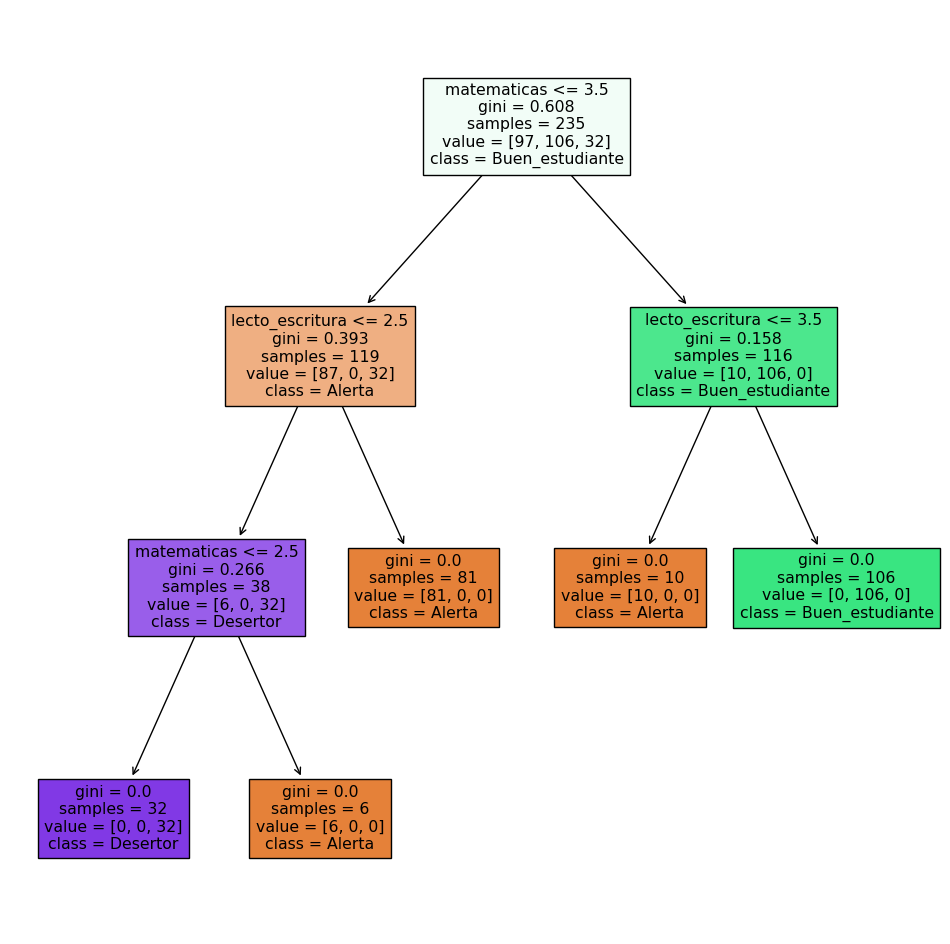

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(
    model, feature_names=['matematicas', 'lecto_escritura'],
    class_names=df['clasificacion'].unique(), filled=True, ax=ax)
plt.show()

## **Predicción futura**

In [ ]:
# Prediccion
nmat = 5
nlecto = 0

# Realizar una predicción
pred = model.predict([[nmat, nlecto]])
pred_clas = pred[0]
print(f'la clasificación del estudiante es: {pred_clas}')

la clasificación del estudiante es: Alerta


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## **Interpretación del arbol**

* La interpretación del árbol de decisión implica seguir las ramas desde el nodo raíz hasta las hojas, siguiendo las condiciones especificadas en cada nodo. A medida que se desciende por el árbol, se llega a las hojas que contienen la clasificación final para un conjunto específico de características.

* Cada nodo interno del árbol tiene una pregunta o condición sobre una de las características. Esto continúa hasta que se llega a una hoja, que representa la clasificación final.

* La información de cada nodo es la siguiente:
> 1. **Condición:** si es un nodo donde se toma alguna decisión
> 2. **Gini:** es una medida de impureza. Cuando Gini vale 0, significa que ese nodo es totalmente puro. La impureza se refiere a cómo estan mezcladas las clases en cada nodo.
> 3. **Samples:** número de muestras que satisfacen las condiciones necesarias para llegar a este nodo.
> 4. **Value:** cuántas muestras de cada clase llegan a este nodo.
> 5. **Class:** qué clase se le asigna a las muestras que llegan a este nodo.

* Puede ser útil para identificar patrones y relaciones entre las características y la clasificación. Al observar las ramas y los nodos del árbol, se pueden obtener ideas sobre las combinaciones de características que conducen a diferentes resultados de clasificación.

* Es importante recordar que la interpretación de un árbol de decisión debe realizarse en el contexto del problema y el conjunto de datos específico.



## **Guardar el modelo entrenado y ajustado**

In [ ]:
import pickle

# Guardar el modelo en un archivo
with open('modelo_clasificacion.pkl', 'wb') as file:
    pickle.dump(model, file)